In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def backtest(df, initial_balance=10000):
    # Initialize balances and strategy parameters
    usd_balance = initial_balance  # Initial USD balance
    token_balance = 0   # Initial token balance
    trail = 0.15         # Trailing stop loss percentage
    min_token_amount = 0.01  # Minimum token amount for trade
    fees = 0.00         # Trading fees (percentage)
    
    # Lists to hold results
    t_holds = []
    usd_balances = []
    token_balances = []
    portfolio_values = []
    trailing_stop_losses = []
    buy_and_hold_values = []
    num_trades = 0
    trades = []
    
    # Start the strategy from the first date
    initial_time = df['timestamp'].iloc[0]
    initial_price = df['price'].iloc[0]
    threshhold = initial_price
    
    # Calculate initial token amount for buy and hold strategy
    initial_tokens = initial_balance / initial_price
    
    # Implement the trading strategy
    for index, row in df.iterrows():
        price = row['price']
        
        # Update trailing stop loss
        if price * (1 - trail) >= threshhold:
            threshhold = price * (1 - trail)
        
        # Calculate portfolio value
        portfolio_value = usd_balance + token_balance * price
        
        # Calculate buy and hold value
        buy_and_hold_value = initial_tokens * price
        
        # BUY (convert USD to tokens)
        if price < threshhold and token_balance > min_token_amount:
            usd_balance += token_balance * threshhold * (1 - fees)
            token_balance = 0
            num_trades += 1
            trades.append(('sell', row['timestamp'], price, threshhold, portfolio_value))
        
        # SELL (convert tokens to USD)
        elif price >= threshhold and usd_balance > min_token_amount:
            token_balance += (usd_balance / threshhold) * (1 - fees)
            usd_balance = 0
            num_trades += 1
            trades.append(('buy', row['timestamp'], price, threshhold, portfolio_value))
        
        # Record balances and stop losses
        trailing_stop_losses.append(threshhold)
        portfolio_values.append(portfolio_value)
        token_balances.append(token_balance)
        usd_balances.append(usd_balance)
        t_holds.append(threshhold)
        buy_and_hold_values.append(buy_and_hold_value)
    
    # Add the trailing stop loss and other metrics to the DataFrame
    df['trailing_stop_loss'] = trailing_stop_losses
    df['tsl_value'] = portfolio_values
    df['hold_value'] = buy_and_hold_values
    
    
    return df  # Return the modified DataFrame for further analysis

   timestamp     price  trailing_stop_loss     tsl_value    hold_value
0 2023-08-06  1.689038            1.689038  10000.000000  10000.000000
1 2023-08-07  1.700351            1.689038  10066.978836  10066.978836
2 2023-08-08  1.796504            1.689038  10636.258272  10636.258272
3 2023-08-09  1.682994            1.689038   9964.217883   9964.217883
4 2023-08-10  1.554538            1.689038  10000.000000   9203.688501


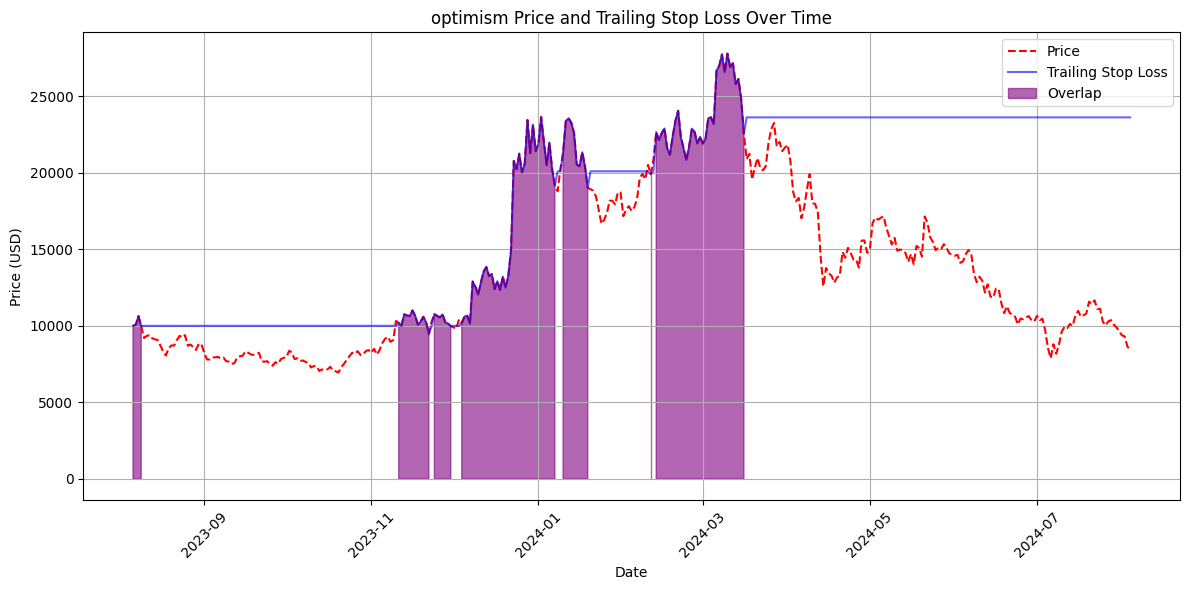

   timestamp        price  trailing_stop_loss     tsl_value    hold_value
0 2023-08-06  1835.070578         1835.070578  10000.000000  10000.000000
1 2023-08-07  1826.706779         1835.070578   9954.422469   9954.422469
2 2023-08-08  1826.933486         1835.070578  10000.000000   9955.657878
3 2023-08-09  1856.844145         1835.070578  10000.000000  10118.652475
4 2023-08-10  1855.890727         1835.070578  10113.456941  10113.456941


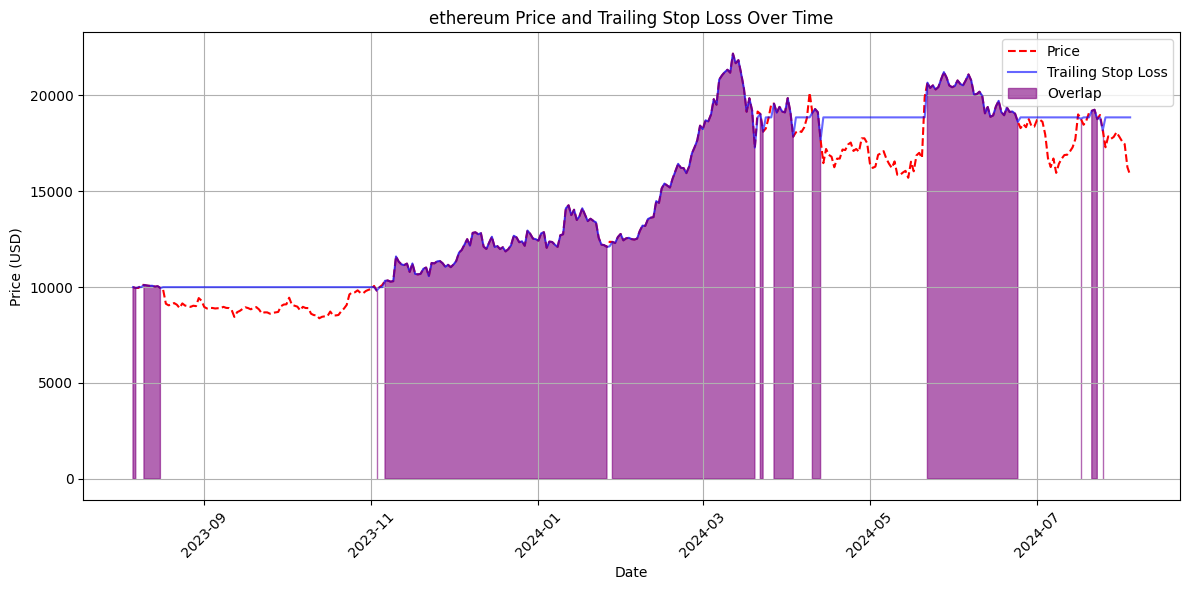

   timestamp         price  trailing_stop_loss     tsl_value    hold_value
0 2023-08-06  29046.800457        29046.800457  10000.000000  10000.000000
1 2023-08-07  29044.204376        29046.800457   9999.106242   9999.106242
2 2023-08-08  29178.147752        29046.800457  10000.000000  10045.219195
3 2023-08-09  29779.561671        29046.800457  10252.269167  10252.269167
4 2023-08-10  29585.488077        29046.800457  10185.455063  10185.455063


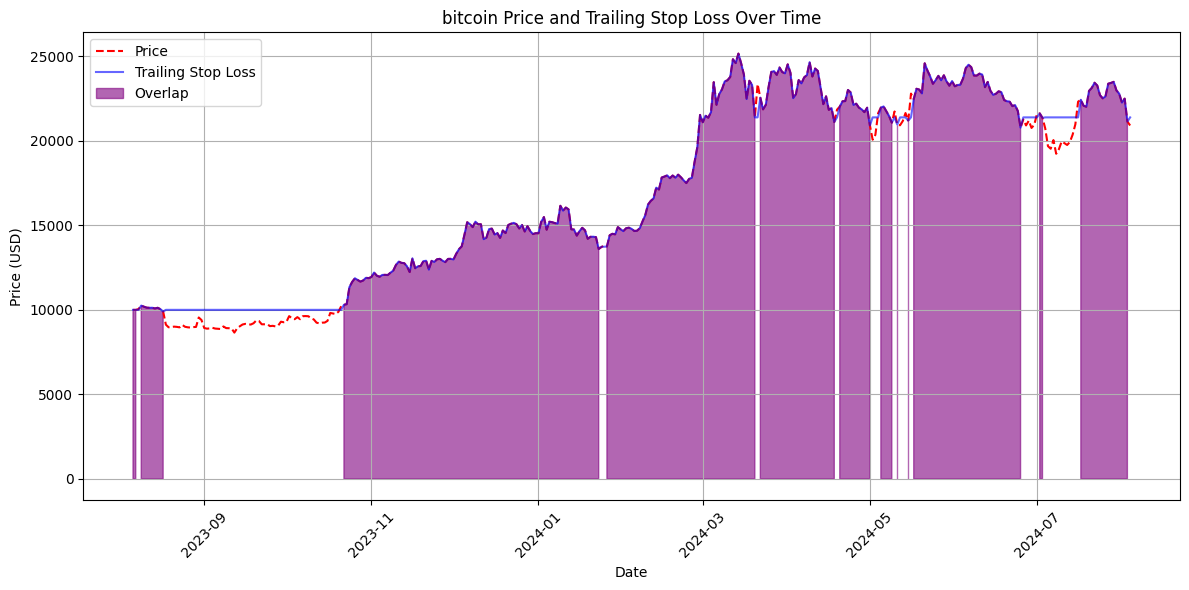

   timestamp     price  trailing_stop_loss     tsl_value    hold_value
0 2023-08-06  7.218538            7.218538  10000.000000  10000.000000
1 2023-08-07  7.090867            7.218538   9823.135444   9823.135444
2 2023-08-08  7.281258            7.218538  10000.000000  10086.887406
3 2023-08-09  7.446213            7.218538  10315.403115  10315.403115
4 2023-08-10  7.697970            7.218538  10664.167894  10664.167894


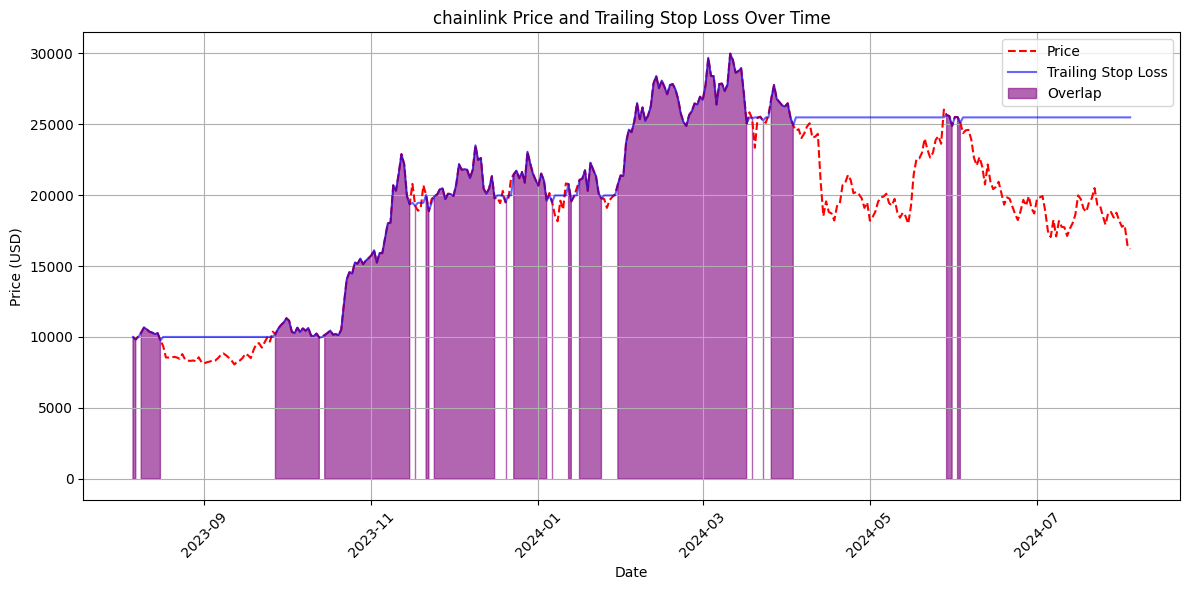

   timestamp     price  trailing_stop_loss     tsl_value    hold_value
0 2023-08-06  6.078771            6.078771  10000.000000  10000.000000
1 2023-08-07  5.937120            6.078771   9766.972896   9766.972896
2 2023-08-08  5.862997            6.078771  10000.000000   9645.035631
3 2023-08-09  6.089805            6.078771  10000.000000  10018.151544
4 2023-08-10  6.269968            6.078771  10314.531874  10314.531874


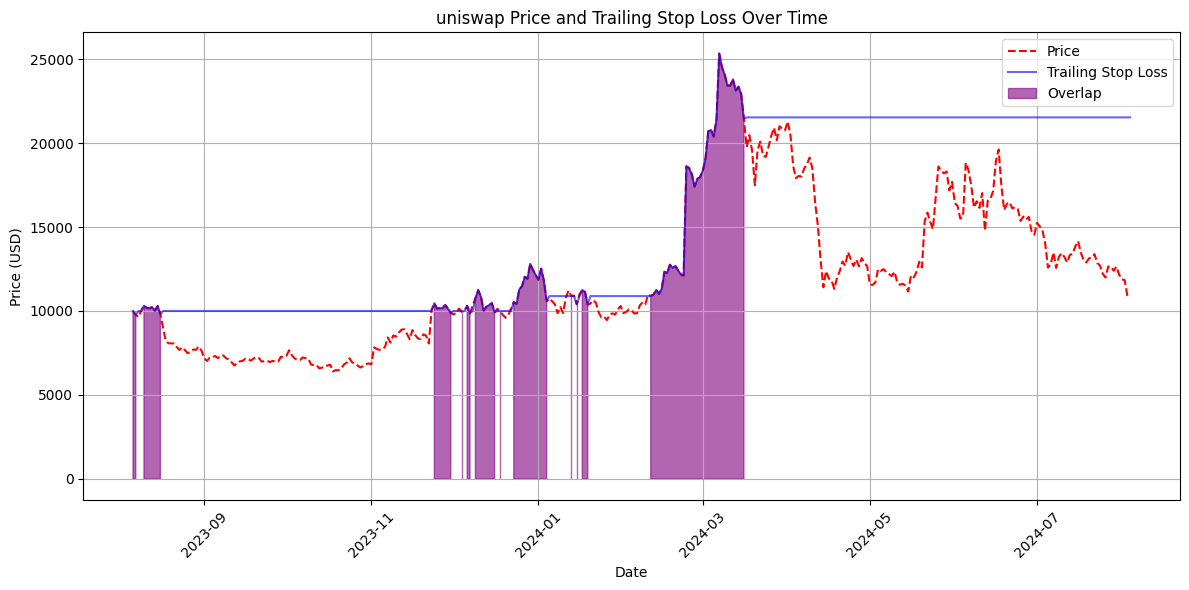

   timestamp     price  trailing_stop_loss     tsl_value    hold_value
0 2023-08-06  1.136023            1.136023  10000.000000  10000.000000
1 2023-08-07  1.135179            1.136023   9992.570868   9992.570868
2 2023-08-08  1.132233            1.136023  10000.000000   9966.633891
3 2023-08-09  1.160203            1.136023  10000.000000  10212.846358
4 2023-08-10  1.175892            1.136023  10350.952711  10350.952711


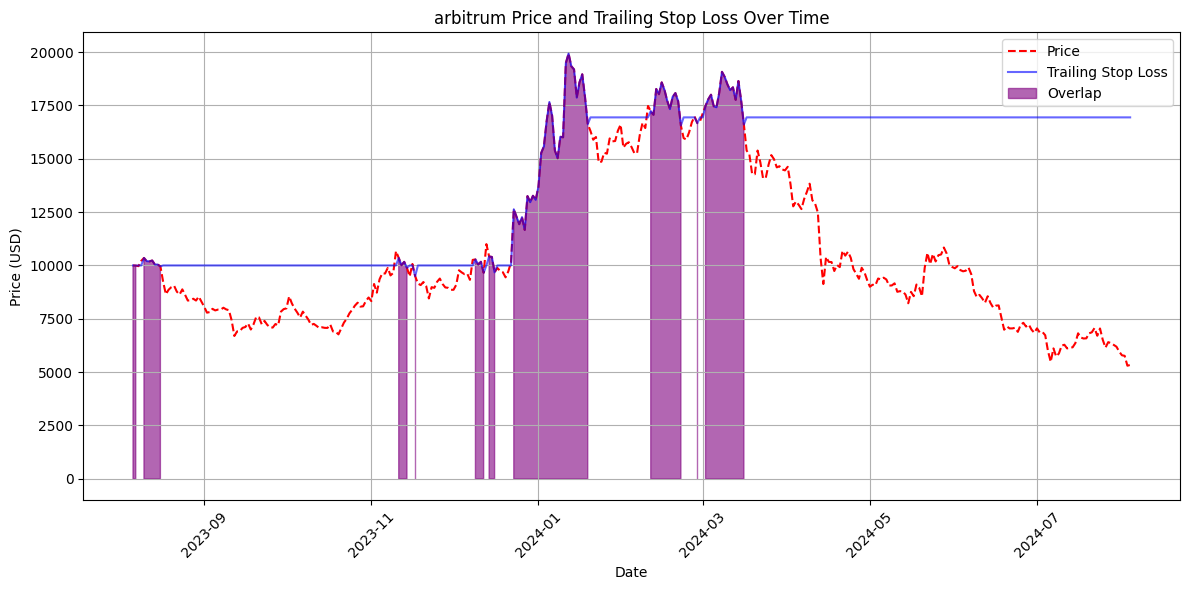

In [2]:
# Load the CSV file into a DataFrame

coins = ["optimism", "ethereum", "bitcoin", "chainlink", "uniswap", "arbitrum"]

for coin in coins:
    file_path = f"priceData/{coin}.csv"
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])  # Ensure timestamp is datetime

    # Run backtest from the first available date
    df_with_trailing_stop_loss = backtest(df)

    # Save the modified DataFrame to a new CSV
    df_with_trailing_stop_loss.to_csv(f"backtestData/{coin}_backtest.csv", index=False)

    # Print the first few rows to verify the added columns
    print(df_with_trailing_stop_loss.head())

    # Plotting the price and trailing stop loss
    plt.figure(figsize=(12, 6))
    plt.plot(df_with_trailing_stop_loss['timestamp'], df_with_trailing_stop_loss['hold_value'], label='Price', color='red', linestyle='--' )
    plt.plot(df_with_trailing_stop_loss['timestamp'], df_with_trailing_stop_loss['tsl_value'], label='Trailing Stop Loss', color='blue', alpha=0.6)
    
    # # Highlight overlapping regions
    overlaps = df_with_trailing_stop_loss['tsl_value'] == df_with_trailing_stop_loss['hold_value']
    plt.fill_between(df_with_trailing_stop_loss['timestamp'], df_with_trailing_stop_loss['tsl_value'], 
                     where=overlaps, color='purple', alpha=0.6, label='Overlap')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'{coin} Price and Trailing Stop Loss Over Time')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()

In [3]:
import pandas as pd
import os
import json

def append_coin_data_to_json():
    # Directory containing the CSV files
    csv_directory = "backtestData"
    
    # Initialize an empty dictionary to store all coins' data
    all_coins_data = {}

    # Loop through each file in the directory
    for filename in os.listdir(csv_directory):
        if filename.endswith(".csv"):
            # Extract the coin name from the filename (assuming filename format: coin.csv)
            coin_name = filename.replace("_backtest.csv", "")
            
            # Load the CSV file into a DataFrame
            file_path = os.path.join(csv_directory, filename)
            df = pd.read_csv(file_path)

            # Convert DataFrame to a list of dictionaries
            coin_data = df.to_dict(orient='records')

            # Add the coin data to the main dictionary with the coin name as the key
            all_coins_data[coin_name] = coin_data

    # Convert the entire dictionary to a JSON string
    json_data = json.dumps(all_coins_data, indent=4)

    # Write the JSON data to a file
    output_file = "all_coins_data.json"
    with open(output_file, "w") as json_file:
        json_file.write(json_data)

    print(f"All coin data has been saved to {output_file}")

# Run the function
append_coin_data_to_json()


All coin data has been saved to all_coins_data.json


In [13]:
## append a new coin to the json file
import pandas as pd
import json

def append_new_coin_to_json(coin_name, csv_file):
    # Load the existing JSON file
    with open("all_coins_data.json", "r") as json_file:
        all_coins_data = json.load(json_file)

    # Load the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Ensure the 'timestamp' column is in datetime format
    df['timestamp'] = df['date']

    # Convert DataFrame to a list of dictionaries
    coin_data = df[['timestamp', 'price']].to_dict(orient='records')
    


    initial_time = df['timestamp'].iloc[0]
    initial_price = df['price'].iloc[0]
    threshhold = initial_price
    
    # Calculate initial token amount for buy and hold strategy
    initial_tokens = 10000 / initial_price

    for record in coin_data:
        record['trailing_stop_loss'] = 0
        record['tsl_value'] = 0
        record['hold_value'] = record['price'] * initial_tokens
    # Add the coin data to the main dictionary with the coin name as the key
    all_coins_data[coin_name] = coin_data

    # Convert the entire dictionary to a JSON string
    json_data = json.dumps(all_coins_data, indent=4)

    # Write the JSON data back to the file
    with open("all_coins_data.json", "w") as json_file:
        json_file.write(json_data)

    print(f"{coin_name} data has been appended to the JSON file")

# Run the function
append_new_coin_to_json("amkt", "priceData/amkt.csv")


amkt data has been appended to the JSON file
